In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
# !pip install -U pip setuptools wheel
# !pip install -U spacy


In [2]:
df = pd.read_csv("D:/Data Science/Assignments/Text mining/oneplus10_pro.csv",encoding="latin1")
df.head()

,Unnamed: 0,Review
0,0,No words to say.the first impression itself sh...
1,1,Only difference is the price. Hassle bad is re...
2,2,I've Been using iPhone since iPhone 4 - iPhone...
3,3,I have exchange my mobile but facing same prob...
4,4,The phone got delivered within a day so no com...


In [3]:
dfnew=df.drop(columns=['Unnamed: 0'])

In [4]:
dfnew.head()

,Review
0,No words to say.the first impression itself sh...
1,Only difference is the price. Hassle bad is re...
2,I've Been using iPhone since iPhone 4 - iPhone...
3,I have exchange my mobile but facing same prob...
4,The phone got delivered within a day so no com...


In [5]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  40 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


# Data Cleaning

In [6]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
cleaned_df = df.Review.apply(clean)
cleaned_df

0     no words to saythe first impression itself sho...
1     only difference is the price hassle bad is rea...
2     ive been using iphone since iphone   iphone  t...
3     i have exchange my mobile but facing same prob...
4     the phone got delivered within a day so no com...
5     the phone is getting so heat ð¥  battery als...
6                                         â i have b...
7     please dont buy this phone oneplus has made on...
8     you will never regret for buying this proevery...
9     couple of issues we faced with this phone a it...
10    i have been using oneplus mobiles from  to  pr...
11                                        â looks go...
12    phone is good but its overpricedits worth arou...
13    got this product on  apr  and i am using from ...
14    the images taken from back main camera in room...
15         good product oneplus  pro or network problem
16    this one plus  pro is superb phoneperformance ...
17     normal usage tem ° to ° game not  fb mass

In [8]:
#Word frequency
freq = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq

is         91
and        78
phone      65
to         62
the        58
a          53
i          50
this       44
for        38
it         38
oneplus    37
of         36
not        33
in         25
my         24
with       24
but        23
good       21
on         21
you        20
dtype: int64

In [9]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
cleaned_df = cleaned_df.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq_Sw

phone      65
oneplus    37
good       21
battery    17
one        17
camera     16
dont       13
screen     12
pro        12
iphone     11
buy        10
get        10
heat        9
fast        9
plus        9
using       9
days        8
even        8
back        8
like        7
dtype: int64

In [11]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(cleaned_df)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [12]:
word_freq_df.head(30)

,term,occurrences,frequency
0,accept,1,0.000682
1,accross,1,0.000682
2,accumulate,1,0.000682
3,actual,1,0.000682
4,agent,1,0.000682
5,agopros,1,0.000682
6,agreed,1,0.000682
7,almost,2,0.001364
8,also,7,0.004775
9,always,2,0.001364


In [13]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(cleaned_df)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [14]:
df

,accept,accross,accumulate,actual,agent,agopros,agreed,amaze,amazing,amazingoverall,...,wre,write,writing,writteni,wrong,year,years,yes,yesterday,zoom
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161356,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109928,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.134873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.134873,0.000000,0.000000,0.000000,0.000000,0.000000


# N- Gram

In [15]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [16]:
top2_words = get_top_n2_words(cleaned_df, n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,one plus,9
1,previous phone,4
2,using oneplus,4
3,buy phone,4
4,oneplus pro,4


[Text(0, 0, 'one plus'),
 Text(1, 0, 'previous phone'),
 Text(2, 0, 'using oneplus'),
 Text(3, 0, 'buy phone'),
 Text(4, 0, 'oneplus pro'),
 Text(5, 0, 'phone dont'),
 Text(6, 0, 'call recording'),
 Text(7, 0, 'phone battery'),
 Text(8, 0, 'plus pro'),
 Text(9, 0, 'iphone oneplus'),
 Text(10, 0, 'way better'),
 Text(11, 0, 'one best'),
 Text(12, 0, 'sound quality'),
 Text(13, 0, 'oxygen os'),
 Text(14, 0, 'battery drains'),
 Text(15, 0, 'screen time'),
 Text(16, 0, 'good sound'),
 Text(17, 0, 'used oneplus'),
 Text(18, 0, 'oneplus five'),
 Text(19, 0, 'please dont')]

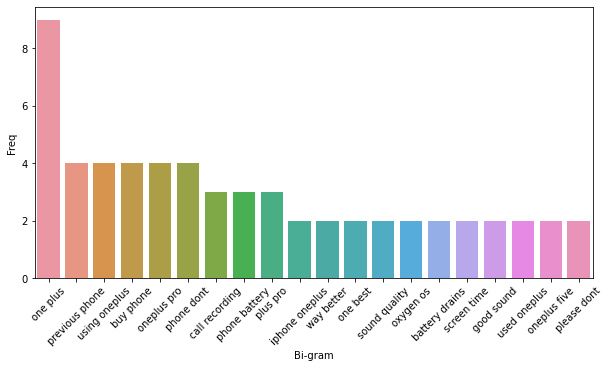

In [17]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [18]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [19]:
top3_words = get_top_n3_words(cleaned_df, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [20]:
top3_df

,Tri-gram,Freq
0,one plus pro,3
1,dont buy phone,2
2,new oneplus pro,2
3,words saythe first,1
4,saythe first impression,1
...,...,...
195,lot battery heats,1
196,battery heats phone,1
197,heats phone heatong,1
198,phone heatong issue,1


[Text(0, 0, 'one plus pro'),
 Text(1, 0, 'dont buy phone'),
 Text(2, 0, 'new oneplus pro'),
 Text(3, 0, 'words saythe first'),
 Text(4, 0, 'saythe first impression'),
 Text(5, 0, 'first impression shows'),
 Text(6, 0, 'impression shows beastð'),
 Text(7, 0, 'shows beastð congratulations'),
 Text(8, 0, 'beastð congratulations oneplus'),
 Text(9, 0, 'congratulations oneplus making'),
 Text(10, 0, 'oneplus making first'),
 Text(11, 0, 'making first onetime'),
 Text(12, 0, 'first onetime foldable'),
 Text(13, 0, 'onetime foldable phone'),
 Text(14, 0, 'difference price hassle'),
 Text(15, 0, 'price hassle bad'),
 Text(16, 0, 'hassle bad really'),
 Text(17, 0, 'bad really bad'),
 Text(18, 0, 'really bad big'),
 Text(19, 0, 'bad big gimmicki')]

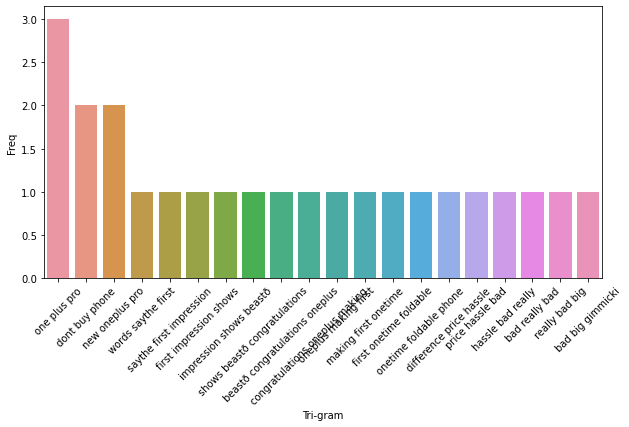

In [21]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# Word Cloud

In [22]:
string_Total = " ".join(cleaned_df)

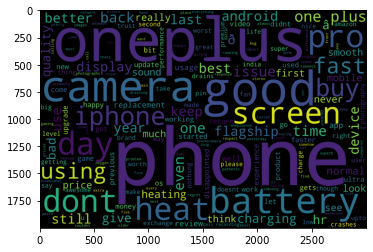

In [23]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 3000,
                height = 2000
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Named Entity Recognition

In [24]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm') 

one_block = string_Total
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [25]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

exchange NOUN
mobile NOUN
facing VERB
problemvery NOUN
big ADJ
problem NOUN
draining VERB
batterycharging VERB
two NUM
times NOUN
day NOUN
phone NOUN
got AUX
delivered VERB
within ADP
day NOUN
complains VERB
thatso ADV
used ADJ
device NOUN
quite ADV
days NOUN
think VERB
good ADJ
certainly ADV
improvelets VERB
talk VERB
great ADJ
display NOUN
screen NOUN
feel VERB
one NUM
best ADJ
gives VERB
premium ADJ
camera NOUN
color NOUN
balance NOUN
definitely ADV
better ADV
older ADJ
sd SCONJ
gen PROPN
makes VERB
security NOUN
like ADP
lock NOUN
screen NOUN
face NOUN
detection NOUN
display NOUN
fingerprint NOUN
really ADV
fast ADV
boost VERB
gaming NOUN
works NOUN
really ADV
good ADJ
surprisingly ADV
games NOUN
like ADP
battleground NOUN
call NOUN
duty NOUN
phone NOUN
cool NOUN
genshin NOUN
impact NOUN
much ADV
sound ADJ
quality NOUN
good ADJ
oxygen NOUN
os ADV
android VERB
battery NOUN
drains NOUN
fast ADV
u NOUN
use NOUN
hz PRON
always ADV
display VERB
anyways ADV
gives VERB
screen NOUN
time NO

In [26]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['genshin', 'impact', 'quality', 'oxygen', 'android', 'battery', 'drains', 'u', 'use', 'display', 'gives', 'screen', 'time', 's', 'manages', 'work', 'camera', 'video', 'phone', 'gets', 'apps', 'player', 'instagram', 'takes', 'lot', 'battery', 'heats', 'phone', 'heatong', 'issue', 'oneplus', 'tries', 'fix', 'ringtones', 'sounds', 'feel', 'phone', 'sound', 'phone', 'battery', 'issues', 'compared', 'devices', 'others', 'phone', 'getting', 'heat', 'ð\x9f\x94¥', 'battery', 'getting', 'using', 'oneplus', 'years', 'flagship', 'started', 'vision', 'settle', 'used', 'oneplus', 'oneplus', 'oneplus', 'oneplus', 'time', 'going', 'beast', 'respectsit', 'reminds', 'flagship', 'killer', 'oneplus', 'created', 'impact', 'time', 'sureeverything', 'used', 'die', 'fan', 'oneplus', 'phones', 'launched', 'look', 'plan', 'way', 'giving', 'experience', 'buy', 'phone', 'oneplus', 'made', 'osyou', 'get', 'make', 'mistake', 'life', 'system', 'becoming', 'company', 'optimization', 'buy', 'phone']


In [27]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,65
1,oneplus,29
2,battery,17
3,camera,16
4,screen,12
5,iphone,11
6,buy,10
7,get,10
8,using,9
9,heat,9


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

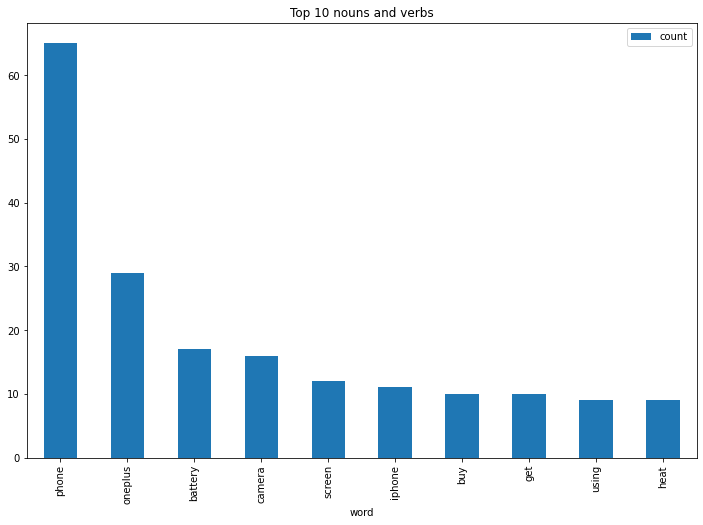

In [29]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

# Emotion Mining

In [30]:
#Sentiment analysis
afinn = pd.read_csv("D:/Data Science/NLP text_processing/Afinn.csv", sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [31]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [32]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [33]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [34]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(dfnew.Review))
sentences

['No words to say.the first impression itself shows that it is a beastð\x9f\x94¥ð\x9f\x94¥ð\x9f\x94¥.',
 'congratulations to  OnePlus for making their first one-time foldable phone.',
 'Only difference is the price.',
 'Hassle bad is really bad and big gimmick.I am still amaze how the photo quality of camera are same for nord and op10pro on oneplus site for price 25k and 67k respectively.Message and dialler UI is really funky and cartoonist.',
 'The cover they are giving with phone is rough from inside and smooth from outside I still don\'t understand the reason.The best feature of this phone is voice play back of "call recording started" and "call recording ended" to both the party loudly.',
 "I've Been using iPhone since iPhone 4 - iPhone 13..Maybe this phone is nice but if you are an iPhone user don't go for OnePlus.You can't compare an iPhone with OnePlus, there's no match.iPhone 11 is way better than this phone.Camera is good but not so satisfying, display is better, charging and 

In [35]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,No words to say.the first impression itself sh...
1,congratulations to OnePlus for making their f...
2,Only difference is the price.
3,Hassle bad is really bad and big gimmick.I am ...
4,The cover they are giving with phone is rough ...
...,...
139,Please don't let us down .
140,Been travelling with One plus since one plus o...
141,Though they went down trajectory since 7T.
142,This phone has proved they are still one of th...


In [36]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [37]:
# test that it works
calculate_sentiment(text = 'very sad')

-2

In [38]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [39]:
# test that it works
calculate_sentiment(text = 'excellent')

3

In [41]:
# test that it works
calculate_sentiment(text = 'shocked')

-2

In [44]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     -1
1      2
2      0
3     -1
4      3
      ..
139    1
140    0
141    0
142    7
143    2
Name: sentiment_value, Length: 144, dtype: int64

In [43]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    13
1    10
2     5
3    40
4    43
5    69
6    19
7    36
8     5
9     7
Name: word_count, dtype: int64

In [45]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
123,Â Pathetic phone Update after 5 days :tip for ...,6,118
91,Seems like a hurried update.The battery chargi...,6,23
142,This phone has proved they are still one of th...,7,30
127,So i have the right to give perfect and honest...,8,17
55,150* is amazing.Overall I'm happy to having th...,9,11
111,"Phone is happy, I am happy :)Camera:Decent to ...",9,10
5,I've Been using iPhone since iPhone 4 - iPhone...,10,69
61,Being OnePlus fan ....product is waste..No aut...,10,163
87,I am very sad to see oneplus brand comprising...,12,142
54,Good product OnePlus 10 pro or network problem...,20,56


In [46]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    144.000000
mean       1.138889
std        3.310528
min      -12.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       20.000000
Name: sentiment_value, dtype: float64

In [47]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,No words to say.the first impression itself sh...,-1,13
2,Only difference is the price.,0,5
3,Hassle bad is really bad and big gimmick.I am ...,-1,40
6,I have exchange my mobile but facing same prob...,-1,19
10,Camera and color balance definitely better tha...,0,9
...,...,...,...
131,I am not telling this as sarcasm .,0,8
132,The heat level is in intolerable limits .,0,8
135,Gaming is out of the level .,0,7
140,Been travelling with One plus since one plus o...,0,10


In [48]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
1,congratulations to OnePlus for making their f...,2,10
4,The cover they are giving with phone is rough ...,3,43
5,I've Been using iPhone since iPhone 4 - iPhone...,10,69
7,The phone got delivered within a day so no com...,2,36
8,"Great display, screen and feel.",3,5
9,One of the best gives premium feeling.2.,3,7
12,Security like lock screen face detection in di...,2,14
13,Boost for gaming and all works really good.,4,8
14,"Surprisingly during games like Battleground, c...",3,18
15,Sound quality is good too7.,3,5


In [49]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,No words to say.the first impression itself sh...,-1,13,0
1,congratulations to OnePlus for making their f...,2,10,1
2,Only difference is the price.,0,5,2
3,Hassle bad is really bad and big gimmick.I am ...,-1,40,3
4,The cover they are giving with phone is rough ...,3,43,4
...,...,...,...,...
139,Please don't let us down .,1,6,139
140,Been travelling with One plus since one plus o...,0,10,140
141,Though they went down trajectory since 7T.,0,7,141
142,This phone has proved they are still one of th...,7,30,142


C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

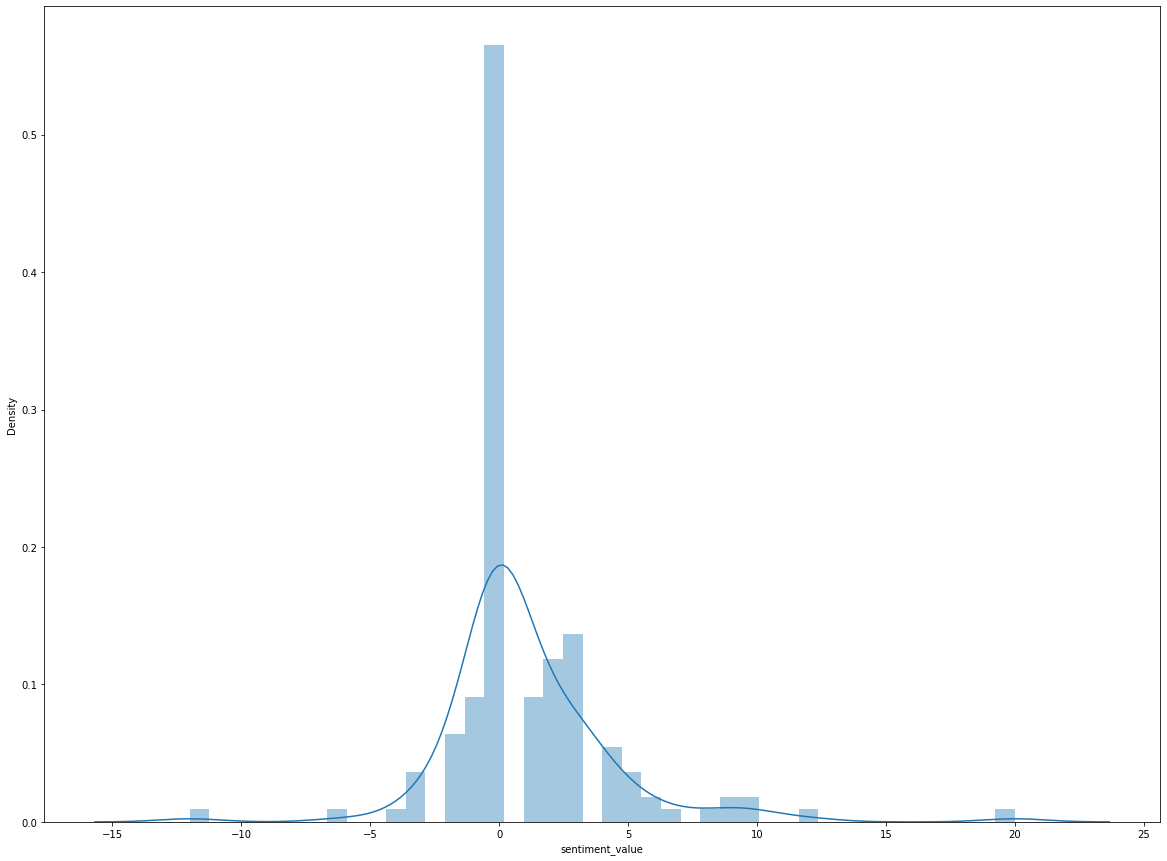

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

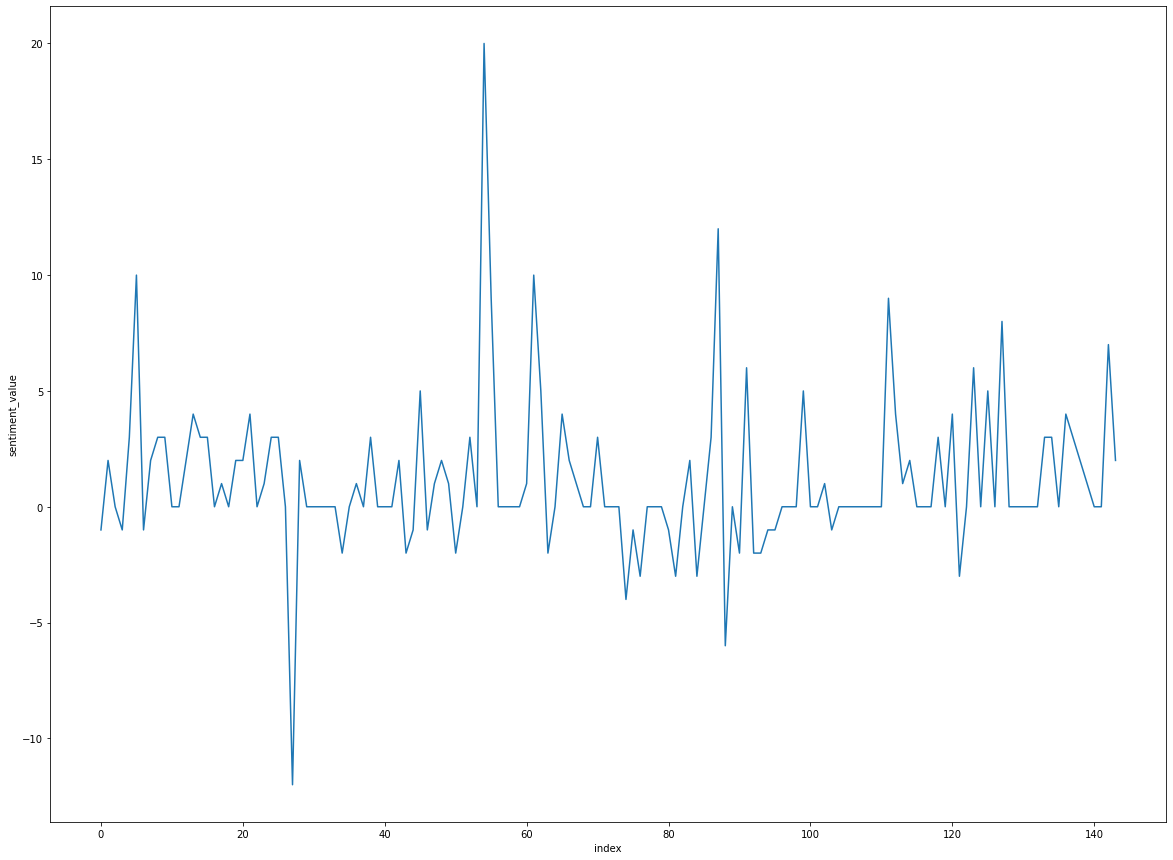

In [52]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(20,15))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

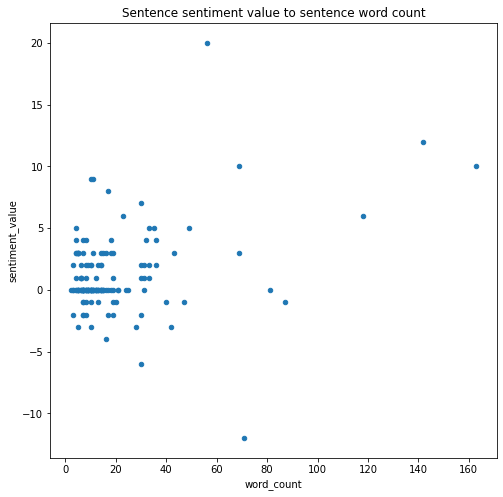

In [53]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')